In [5]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
f_lim = '/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/plots/20230614_plots/feynnet/feynnet_trgkin_mx_my_reweight/new/mx_limits.csv'
f_lim_extsig = '/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/plots/20230614_plots/feynnet/feynnet_trgkin_mx_my_reweight_extsig/new/mx_limits.csv'

In [7]:
def loadtxt(f):
    csv = np.genfromtxt(f, delimiter=',', names=True)
    return ak.Array(csv)

ak_trees = dict(
    lim = loadtxt(f_lim),
    lim_extsig = loadtxt(f_lim_extsig),
)

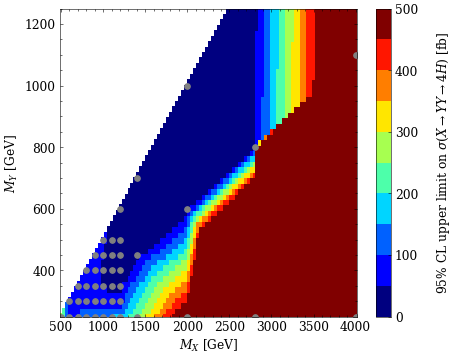

In [13]:
fig, ax = study.get_figax()
study.mxmy_phase(
    ObjIter(ak_trees['lim_extsig']),
    f_var=lambda x : 1000*x.exp_lim_50,
    # zlim=np.linspace(0,180,31),
    zlim=np.linspace(0,500,11),
    # xlim=(500,2500), 
    ylim=(250,1250),
    g_markersize=5,
    g_cmap='jet',
    xlabel='$M_{X}$ [GeV]',
    ylabel='$M_{Y}$ [GeV]',
    zlabel='95% CL upper limit on $\sigma(X\\rightarrow YY\\rightarrow 4H)$ [fb]',
    figax=(fig,ax)
)

In [17]:
def merge(**trees):
    keys = list(trees.keys())

    mx = trees[keys[0]].mx
    my = trees[keys[0]].my

    merged = dict(
        mx=mx, my=my,
        **{
            f"{key}_{field}": trees[key][field]
            for key in keys
            for field in trees[key].fields
            if field not in ['mx','my']
        }
    )

    return ak.zip(merged)

In [18]:
tree = merge(**ak_trees)

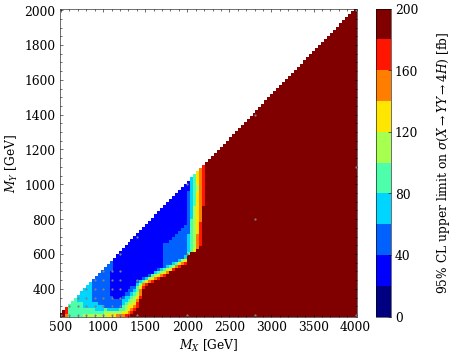

In [23]:
fig, ax = study.get_figax()
study.mxmy_phase(
    ObjIter(tree),
    f_var=lambda x : 1000*x.lim_exp_lim_50,
    # zlim=np.linspace(0,180,31),
    zlim=np.linspace(0,200,11),
    g_cmap='jet',
    g_markersize=1,
    xlabel='$M_{X}$ [GeV]',
    ylabel='$M_{Y}$ [GeV]',
    zlabel='95% CL upper limit on $\sigma(X\\rightarrow YY\\rightarrow 4H)$ [fb]',
    figax=(fig,ax)
)

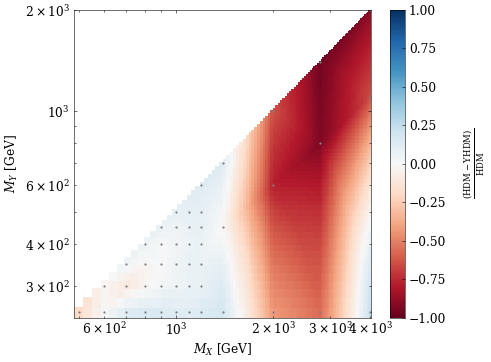

In [30]:
figax = study.get_figax()
study.mxmy_phase(
    ObjIter(tree),
    f_var=lambda x : (x.lim_extsig_exp_lim_50-x.lim_exp_lim_50)/x.lim_exp_lim_50,
    zlim=(-1,1),
    g_markersize=1,
    g_cmap='RdBu',
    logx=True, logy=True,
    xlabel='$M_{X}$ [GeV]',
    ylabel='$M_{Y}$ [GeV]',
    zlabel=r'$\frac{(\mathrm{HDM}-\mathrm{Y HDM})}{\mathrm{HDM}}$',
    figax=figax
)

In [ ]:
figax = study.get_figax()
study.mxmy_phase(
    ObjIter(ak_lim),
    f_var=lambda x : (x.new_btag_exp_lim_50-x.new_exp_lim_50)/x.new_exp_lim_50,
    # zlim=np.linspace(-0.15,0.15,11),
    zlim=(-0.08,0.08),
    g_cmap='RdBu',
    xlabel='$M_{X}$ [GeV]',
    ylabel='$M_{Y}$ [GeV]',
    zlabel=r'$\frac{(\mathrm{With}-\mathrm{Without})}{\mathrm{Without}}$',
    figax=figax,
)